## Packages

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
from nltk.tokenize import TweetTokenizer
import re

## Data

In [174]:
# List of the datasets on which we will apply the operationns
list_data = ['Tweets_sample_confinement.csv', 'Tweets_sample_benalla.csv', 'Tweets_sample_CDM.csv']

In [175]:
# Import data
#git_url = "https://raw.githubusercontent.com/mthsansu/MLNLP/main/Data/"
#df = pd.read_csv(git_url + 'Tweets_sample_confinement.csv', index_col=0, engine='python')
df = pd.read_csv('/data/user/s/msansu/MLNLP/Data/' + list_data[2], index_col=0, engine='python')

In [176]:
# Create a date variable
df['date'] = df['created_at'].str[:10]
df['date'] = pd.to_datetime(df['date'])

In [177]:
df.head()

,author_id,possibly_sensitive,id,text,created_at,twitter,sexe,age,majo,num_deptmt,groupe_sigle,parti_ratt_financier,nb_mandats,age_group,date
2459,889730003495211009,True,1020331022788022272,Je lance dès aujourd’hui ma toute première con...,2018-07-20T15:34:07.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2018-07-20
2466,889730003495211009,True,1018563901993123840,Merci à @equipedefrance de nous avoir offert c...,2018-07-15T18:32:12.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2018-07-15
2467,889730003495211009,True,1018454965264797697,<U+0001F1EB><U+0001F1F7> Allez les Bleus !!!! ...,2018-07-15T11:19:20.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2018-07-15
2474,889730003495211009,True,1017020485106839552,<U+270C><U+FE0F> @SOLIDAGRI84 lauréat de l'opé...,2018-07-11T12:19:13.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2018-07-11
2480,889730003495211009,True,1016960583814533120,"<U+0001F4E2>Chers Amis <U+0001F64C>,\r\n\r\nJe...",2018-07-11T08:21:12.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2018-07-11


## First statistics on the complete set of data

In [178]:
# Number of different tweets in the database
print(len(df.id.unique()),"tweets in total")

31204 tweets in total


In [179]:
# Number of different MPs in the database
print(len(df.author_id.unique()),"distinct authors")

510 distinct authors


In [180]:
# Distribution of tweets considered as possibly sensitive
print("Distribution of tweets considered as possibly sensitive \n", df.possibly_sensitive.value_counts())

Distribution of tweets considered as possibly sensitive 
 False    31162
True        42
Name: possibly_sensitive, dtype: int64


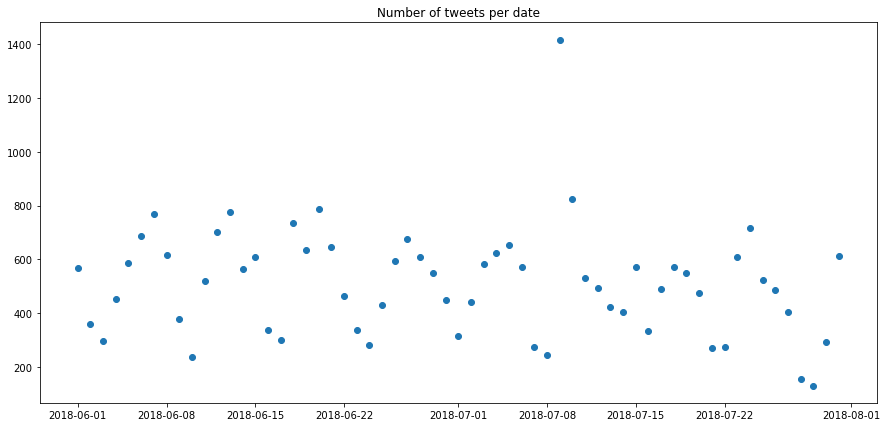

In [181]:
# Plot the number of tweets per date
x = df.date.value_counts().index # Get the date as x-axis
y = df.date.value_counts() # Get the number of tweets per date as y-axis
figure(figsize=(15, 7))
plt.title('Number of tweets per date')
plt.plot_date(x, y, xdate=True)
plt.show() # Plot the graph

Number of tweets done by MPs age:


<AxesSubplot:>

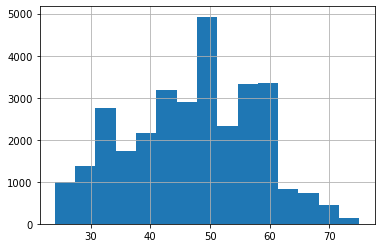

In [182]:
print("Number of tweets done by MPs age:")
df.age.hist(bins=15)

Number of tweets done by political group:


<AxesSubplot:>

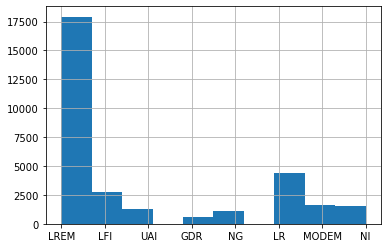

In [183]:
print("Number of tweets done by political group:")
df.groupe_sigle.hist()

In [184]:
print("Distribution of tweets by gender \n", df.sexe.value_counts())

Distribution of tweets by gender 
 M    19223
F    11981
Name: sexe, dtype: int64


In [185]:
print("Distribution of tweets by number of mandates \n", df.nb_mandats.value_counts())

Distribution of tweets by number of mandates 
 1    23332
2     7359
3      513
Name: nb_mandats, dtype: int64


In [186]:
print("Distribution of tweets according to majority belonging \n", df.majo.value_counts())

Distribution of tweets according to majority belonging 
 True     20879
False    10325
Name: majo, dtype: int64


## Some statistics on tweets themeselves

In [187]:
# Mean length of tweets in characters
print("Mean length of tweets in characters:",df.text.apply(len).mean())

Mean length of tweets in characters: 228.29371234457122


In [188]:
# Number of "words": we split by a space(naive approach)
df['words_len'] = df.text.apply(lambda x: len(x.split(' ')) )

<AxesSubplot:>

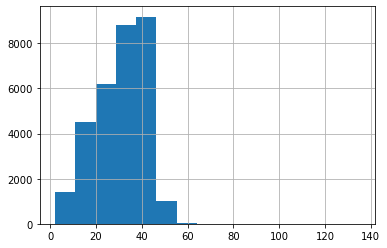

In [189]:
# Distribution of tweets according to length in words
df.words_len.hist(bins=15)

In [190]:
# Mean number of words according to gender
print("Mean number of words per tweet according to gender \n",df.groupby(df.sexe).words_len.mean())
print("\nCorresponding standard deviations \n",df.groupby(df.sexe).words_len.std())

Mean number of words per tweet according to gender 
 sexe
F    30.811368
M    30.585497
Name: words_len, dtype: float64

Corresponding standard deviations 
 sexe
F    10.716827
M    11.047860
Name: words_len, dtype: float64


In [191]:
# Mean number of words according to age group
print("Mean number of words per tweet according to age group \n",
      "1: less than 35; 2: 35-44; 3: 45-54; 4: 55-64; 5: 65+ \n",
      df.groupby(df.age_group).words_len.mean())
print("\nCorresponding standard deviations \n",df.groupby(df.age_group).words_len.std())

Mean number of words per tweet according to age group 
 1: less than 35; 2: 35-44; 3: 45-54; 4: 55-64; 5: 65+ 
 age_group
1    32.575107
2    31.171388
3    30.238630
4    30.076217
5    27.398659
Name: words_len, dtype: float64

Corresponding standard deviations 
 age_group
1    10.285928
2    10.741068
3    10.998141
4    11.054350
5    11.565452
Name: words_len, dtype: float64


In [192]:
# Mean number of words according to number of mandates
print("Mean number of words per tweet according to number of mandates \n",df.groupby(df.nb_mandats).words_len.mean())
print("\nCorresponding standard deviations \n",df.groupby(df.nb_mandats).words_len.std())

Mean number of words per tweet according to number of mandates 
 nb_mandats
1    31.001243
2    29.637179
3    30.555556
Name: words_len, dtype: float64

Corresponding standard deviations 
 nb_mandats
1    10.814985
2    11.185513
3    11.050900
Name: words_len, dtype: float64


In [193]:
# Mean number of words according to majority participation
print("Mean number of words per tweet according to majority participation \n",df.groupby(df.majo).words_len.mean())
print("\nCorresponding standard deviations \n",df.groupby(df.majo).words_len.std())

Mean number of words per tweet according to majority participation 
 majo
False    30.522518
True     30.746252
Name: words_len, dtype: float64

Corresponding standard deviations 
 majo
False    11.204148
True     10.779739
Name: words_len, dtype: float64


In [194]:
# Mean number of words according to political group
print("Mean number of words per tweet according to political group \n",df.groupby(df.groupe_sigle).words_len.mean())
print("\nCorresponding standard deviations \n",df.groupby(df.groupe_sigle).words_len.std())

Mean number of words per tweet according to political group 
 groupe_sigle
GDR      29.437710
LFI      30.969862
LR       30.227439
LREM     30.937378
MODEM    29.568350
NG       31.571685
NI       30.519949
UAI      29.184211
Name: words_len, dtype: float64

Corresponding standard deviations 
 groupe_sigle
GDR      11.068253
LFI      11.305173
LR       11.205864
LREM     10.639209
MODEM    10.905250
NG       11.144194
NI       10.985188
UAI      12.345403
Name: words_len, dtype: float64


## Word-level preprocessing

In [195]:
# List of words with separator = " "
list_words = df.text.apply(lambda x: x.split(' ')).array
# Flattening to a single list
list_words = [x for X in list_words for x in X]
# Render the number of distinct words in the dataset
print('%s "words" in total for this dataset' % (len(set(list_words))))

134716 "words" in total for this dataset


In [196]:
# Function to clean the tweets (preprocessing)
def clean(text):
    text = re.sub("@[A-Za-z0-9_]+","", text) # Removing mention
    text = re.sub(r'http\S+', '', text) # Removing link
    text = text.replace('\n',' ') # Removing new line
    text = re.sub('#', '', text) # Removing hash
    text = re.sub(' +', ' ', text) # Remove additional spaces
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # remove emoji
    return text
df["text_clean"] = df["text"].apply(lambda x: clean(x))

In [197]:
# List of cleaned words
list_words_2 = df.text_clean.apply(lambda x: x.split(' ')).array
list_words_2 = [x for X in list_words_2 for x in X]
print('%s cleaned "words" in total for this dataset' % (len(set(list_words_2))))

92472 cleaned "words" in total for this dataset


In [198]:
# List of tokens
list_tokens_1 = df.text.apply(lambda x: TweetTokenizer().tokenize(x)).array
list_tokens_1 = [x for X in list_tokens_1 for x in X]
print('%s tokens in total for this dataset' % (len(set(list_tokens_1))))

90855 tokens in total for this dataset


In [199]:
# List of tokens
list_tokens_2 = df.text_clean.apply(lambda x: TweetTokenizer().tokenize(x)).array
list_tokens_2 = [x for X in list_tokens_2 for x in X]
print('%s "cleaned" tokens in total for this dataset' % (len(set(list_tokens_2))))

54147 "cleaned" tokens in total for this dataset


## Specificity of tweet contents

In [200]:
# We want to match some specificity of Twitter contents and render it
hash_prog = re.compile('#') # matching hash
mention_prog = re.compile('@[A-Za-z0-9_]+') # matching mention
link_prog = re.compile(r'http\S+') # # matching url
emoji_prog = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
# Calculating number of matches for every tweet
progs = [hash_prog, mention_prog, link_prog, emoji_prog]
nb_types = ['hash', 'mention', 'link', 'emoji']
for prog, nb_type in zip(progs, nb_types):
  df[nb_type] = df['text'].apply(lambda x: len(prog.split(x))-1).array